In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq
from math import pi
from scipy import stats 

(1000, 1)


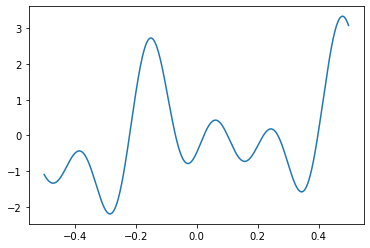

In [2]:
N = 1000
dx = 0.001

x = np.linspace(-N/2*dx, (N/2-1)*dx, N, endpoint=False)
x = np.reshape(x, (N, 1))
print(np.shape(x))

seed = 1
np.random.seed(seed)
b1,b2,b3 = np.random.uniform(0,2*pi,3)
# y = np.exp(-x**2)
# y = np.sin(2*pi*x) + 2*np.sin(10*2*pi*x) + 3*np.sin(20*2*pi*x) + 4*np.sin(30*2*pi*x)
y = np.sin(x) + np.sin(10*x+b1) + np.sin(20*x+b2) + np.sin(30*x+b3)
y = np.reshape(y, (N, 1))

plt.plot(x, y)
plt.show()

In [3]:
# calculate f_p

px = 1/2/pi
# px = stats.norm.pdf(x, loc=0, scale=1) # write the  function 
# print(len(px))
# plt.plot(x, px)
f_mean = np.sum(px * y * dx)
fp = np.sqrt(px) * (y - f_mean)

In [4]:
# method 1: Fourier transform 

1000


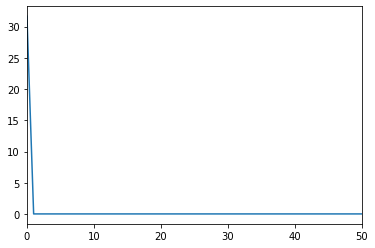

In [5]:
# discrete fourier transform 

def fft1(gn):
    N = len(gn)
    t = np.linspace(0, 1.0, N)
    k = np.linspace(-N/2, N/2-1, N)
    f = np.arange(N, dtype=complex)
    
    for index in k:
        index = int(index)
        f[index]=complex(np.sum(np.cos(2*np.pi*index*t)*gn), -np.sum(np.sin(2*np.pi*index*t)*gn))
    return f

yf1 = fft1(fp)
print(len(yf1))
xf = fftfreq(N,dx)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
plt.xlim(0,50)
plt.show()

1000


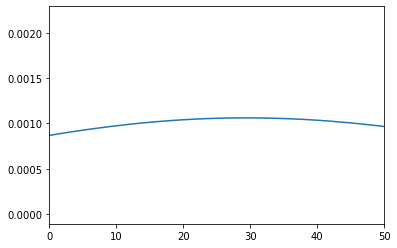

In [6]:
# fast Fourier transform

yf = fft(fp)
print(len(yf))

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0,50)
plt.show()

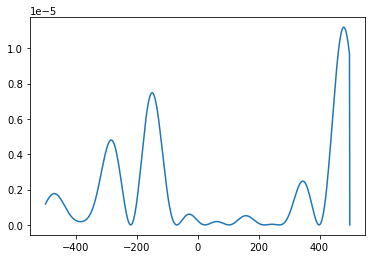

In [7]:
# the minimization function 

dw = 2*pi/N/dx 
K = np.linspace(-N/2, N/2-1, N)
K = np.reshape(K, (N, 1))
# print(len(K))
exp_k = np.array(np.zeros(N), dtype = complex)

for i in range(len(K)-1): 
    # print(K[i])
    exp_k[i] = complex(np.cos(K[i]*pi), -np.sin(K[i]*pi))
    # print(Fp)
    
yf = np.reshape(yf, (N,1))
exp_k = np.reshape(exp_k, (N,1))
f2 = np.abs(yf * exp_k * dx)**2 * dw

plt.plot(K,f2)
plt.show()

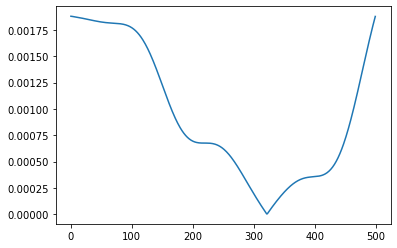

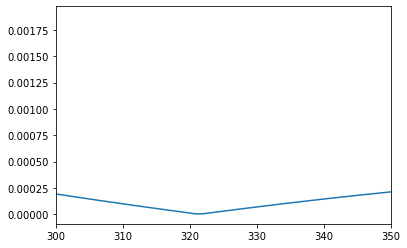

In [8]:
def func(k): 
    f2_sum = np.sum(f2)
    if k>=0 and k<=N/2-1: 
        if k==0: 
            index = int(k + N/2)
            low = f2[index]
            high = f2_sum - low
        else:
            index_left = int(-k + N/2)
            index_right = int(k + N/2)
            low = np.sum(f2[index_left:index_right])
            high = f2_sum - low
        f = np.abs(low-high)
    else: 
        print("index error")
    return f

n0 = range(0, int(N/2))
f0 = np.zeros(int(N/2))
for k in n0:
    f0[k] = func(k)

plt.plot(n0, f0)
plt.show()

plt.plot(n0, f0)
plt.xlim(300,350)
plt.show()


In [9]:
# calculate the cut-off w0

f_min = min(f0)
print(f_min)

w0 = np.argmin(f0) 
print(w0)

3.6207629955675204e-06
321


In [10]:
with open('my_x_data.npy', 'wb') as fs:
    np.save(fs, x)

with open('my_x_data.npy', 'rb') as fs:
    x = np.load(fs)

In [11]:
import tensorflow as tf 
from tensorflow import keras 

In [12]:
# training the function with NN 

seed = 2022 
np.random.seed(seed)
# random sample from U(-pi,pi)
x_train = np.random.uniform(-pi,pi,512)
# x_train = np.random.normal(0, 1, 1000)
y_train = np.sin(x_train) + np.sin(10*x_train+b1) + np.sin(20*x_train+b2) + np.sin(30*x_train+b3)
# y_train = np.sin(2*pi*x_train) + 2*np.sin(10*2*pi*x_train) + 3*np.sin(20*2*pi*x_train) + 4*np.sin(30*2*pi*x_train)

# reshaping 
x_train = x_train.reshape((len(x_train), 1))
# print(len(x_train))
y_train = y_train.reshape((len(y_train), 1))
# print(len(y_train))

In [13]:
# define the keras model 
K = 64
input_layer = keras.Input(shape = (1, ))
hidden_layer_1 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_2 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_3 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_4 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
hidden_layer_5 = keras.layers.Dense(units = K, 
                                    activation = 'sigmoid')
output_layer = keras.layers.Dense(units = 1, 
                                    use_bias = False)
model = keras.Sequential([input_layer, hidden_layer_1,
                          hidden_layer_2, hidden_layer_3, 
                          hidden_layer_4, hidden_layer_5, 
                          output_layer])

# compling the model 
adam = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer = 'adam', loss = 'mse')

In [14]:
def SB_epoch(n_epoch): 
    # fitting the data 
    tf.random.set_seed(seed)
    beta = model.fit(x_train, y_train, epochs=n_epoch, batch_size=32)

    # predicting the data
    predict_1 = model.predict(x)
    # print(np.shape(predict_1))

    # compute r
    predict_1 = np.reshape(predict_1, (N,1))
    r = y - predict_1
    # print(np.shape(r))

    plt.plot(x, y, color='black')
    plt.plot(x, predict_1, color='green')
    plt.plot(x, r, color='red')
    plt.show()

    # calculate r_p
    r_mean = np.sum(px * r * dx)
    rp = np.sqrt(px) * (r - r_mean)
    # print(np.shape(rp))

    # Fourier transform 
    rf = fft(rp)
    rf = np.reshape(rf, (N, 1))

    # compute sum_low
    r2 = np.abs(rf * exp_k * dx)**2 * dw
    r_sum_low = sum(r2[0:int(w0 + N/2)])
    # print(r_sum_low)

    # compute SB
    a = r_sum_low
    b = sum(f2)
    e_low = a/b 
    # print(e_low)

    var_r = np.var(r)
    var_f = np.var(y)
    FVU = var_r/var_f 
    # print(FVU)
    e_high = FVU - e_low
    SB = (e_high - e_low) / (e_high + e_low)
    # print(SB)
    return FVU, SB

Epoch 1/20
16/16 [==============================] - 0s 2ms/step - loss: 0.7074
Epoch 2/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7135
Epoch 3/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7119
Epoch 4/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7172
Epoch 5/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7188
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.7207
Epoch 7/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7250
Epoch 8/20
16/16 [==============================] - 0s 2ms/step - loss: 0.7108
Epoch 9/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7182
Epoch 10/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7272
Epoch 11/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7131
Epoch 12/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7133
Epoch 13/20
16/16 [==============================

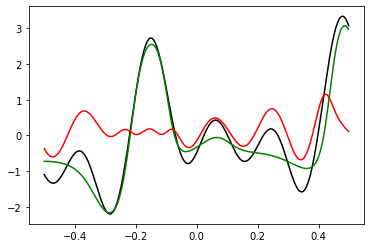

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7155
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7135
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7080
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7151
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7178
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7198
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7239
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7104
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7181
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7278
Epoch 11/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7128
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7134
Epoch 13/100
16/16 [=================

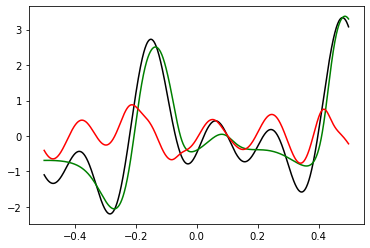

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7467
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7259
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7115
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7161
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7164
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7192
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7255
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7103
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7152
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7250
Epoch 11/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7107
Epoch 12/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7082
Epoch 13/500
16/16 [=================

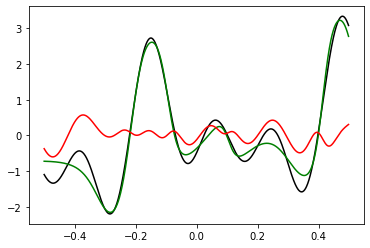

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6869
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6952
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6945
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6985
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6976
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6984
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.7010
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6882
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6953
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7044
Epoch 11/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6906
Epoch 12/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6911
Epoch 13/1000
16/16 [====

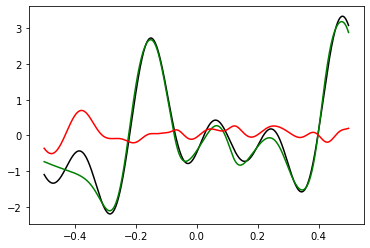

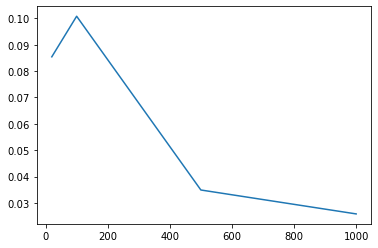

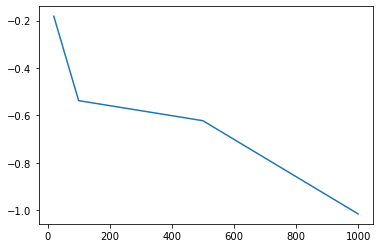

In [17]:
epoch_list = np.array([20, 100, 500, 1000], dtype='int')

i=0
FVU_list = np.zeros(4)
SB_list = np.zeros(4)
for epoch in epoch_list: 
    SB_result = SB_epoch(epoch)
    FVU_list[i] = SB_result[0]
    SB_list[i] = SB_result[1]
    i = i+1

plt.plot(epoch_list, FVU_list)
plt.show()
plt.plot(epoch_list, SB_list)
plt.show()